# Housing Price 예측 모델 
- 소스 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques
- 데이터필드 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## 데이터 저장 디렉토리 생성

In [11]:
import os
DATA_PATH = '../input'

if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

## 데이터 파일 다운로드
- kaggle 가입 : https://www.kaggle.com/  
- kgggle.json 파일 다운로드 : https://www.kaggle.com/(username)/account    
- kgggle.json 파일 업로드 

In [12]:
! pip install -q kaggle

In [13]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kgpark88","key":"2611486fb45e9228abd65811550fc23e"}'}

In [14]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
! kaggle competitions download -p ../input/ -c house-prices-advanced-regression-techniques

train.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


# Import Library

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import matplotlib.pyplot as plt

---

# Import Raw Data

In [17]:
import os
print(os.listdir("../input"))

['sample_submission.csv', 'data_description.txt', 'train.csv', 'test.csv']


In [18]:
raw_data = pd.read_csv('../input/train.csv')

---

# Explore Data

In [19]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
raw_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

---

# Numeric Data

### Find Numeric Data Columns

In [21]:
numeric_colmuns = []
numeric_colmuns.extend(list(raw_data.dtypes[raw_data.dtypes == np.int64].index))
numeric_colmuns.extend(list(raw_data.dtypes[raw_data.dtypes == np.float64].index))

In [22]:
numeric_colmuns

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

#### SalePrice to Last Index

In [23]:
numeric_colmuns.remove('SalePrice')
numeric_colmuns.append('SalePrice')

#### Remove Id

In [24]:
numeric_colmuns.remove('Id')

### Get Numeric Data

In [25]:
numeric_data = DataFrame(raw_data, columns=numeric_colmuns)

#### Explore Numeric Data

In [26]:
numeric_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1452.000000,1379.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,70.049958,103.685262,1978.506164,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,24.284752,181.066207,24.689725,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,21.000000,0.000000,1900.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,59.000000,0.000000,1961.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,69.000000,0.000000,1980.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,80.000000,166.000000,2002.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,313.000000,1600.000000,2010.000000,755000.000000


In [27]:
numeric_data.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,65.0,196.0,2003.0,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,80.0,0.0,1976.0,181500
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,68.0,162.0,2001.0,223500
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,60.0,0.0,1998.0,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,84.0,350.0,2000.0,250000
5,50,14115,5,5,1993,1995,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,85.0,0.0,1993.0,143000
6,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,75.0,186.0,2004.0,307000
7,60,10382,7,6,1973,1973,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,NaN,240.0,1973.0,200000
8,50,6120,7,5,1931,1950,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,51.0,0.0,1931.0,129900
9,190,7420,5,6,1939,1950,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,50.0,0.0,1939.0,118000


### NAN Data

In [28]:
nan_columns = np.any(pd.isna(numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [29]:
nan_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

#### Assume NAN Values as 0

In [30]:
numeric_data['LotFrontage'] = numeric_data['LotFrontage'].fillna(0)
numeric_data['MasVnrArea'] = numeric_data['MasVnrArea'].fillna(0)
numeric_data['GarageYrBlt'] = numeric_data['GarageYrBlt'].fillna(0)

#### Check NAN Data

In [31]:
nan_columns = np.any(pd.isna(numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [32]:
nan_columns

[]

---

# Linear Regression with Numeric Data

In [33]:
import torch
import torch.nn as nn

In [34]:
numeric_x_columns = list(numeric_data.columns)
numeric_x_columns.remove('SalePrice')
numeric_y_columns = ['SalePrice']

In [35]:
numeric_x_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [36]:
numeric_x_df = DataFrame(numeric_data, columns=numeric_x_columns)
numeric_y_df = DataFrame(numeric_data, columns=numeric_y_columns)

In [37]:
numeric_x = torch.tensor(numeric_x_df.values, dtype=torch.float)
numeric_y = torch.tensor(numeric_y_df.values, dtype=torch.float)

#### Check Shape

In [38]:
numeric_x.shape

torch.Size([1460, 36])

In [39]:
numeric_y.shape

torch.Size([1460, 1])

#### Define Model : 5-Layer Net

In [40]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net, self).__init__()
        
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
        
    def forward(self, x):
        y_pred = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(y_pred).clamp(min=0)
        y_pred = self.linear3(y_pred).clamp(min=0)
        y_pred = self.linear4(y_pred)
        return y_pred

In [41]:
H1, H2, H3 = 500, 1000, 200

In [42]:
D_in, D_out = numeric_x.shape[1], numeric_y.shape[1]

### First Prediction

In [43]:
model1 = Net(D_in, H1, H2, H3, D_out)

In [44]:
criterion = nn.MSELoss(reduction='sum')

In [45]:
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-4)

In [46]:
losses1 = []

for t in range(500):
    y_pred = model1(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    print(t, loss.item())
    losses1.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 56995860185088.0
1 inf
2 nan


### Normalize Data

#### Saving Mean, Max, Min for each Columns

In [47]:
means, maxs, mins = dict(), dict(), dict()

In [48]:
for col in numeric_data:
    means[col] = numeric_data[col].mean()
    maxs[col] = numeric_data[col].max()
    mins[col] = numeric_data[col].min()

In [49]:
numeric_data = (numeric_data - numeric_data.mean()) / (numeric_data.max() - numeric_data.min())

In [50]:
numeric_x_df = DataFrame(numeric_data, columns=numeric_x_columns)
numeric_y_df = DataFrame(numeric_data, columns=numeric_y_columns)

In [51]:
numeric_x = torch.tensor(numeric_x_df.values, dtype=torch.float)
numeric_y = torch.tensor(numeric_y_df.values, dtype=torch.float)

# Second Prediction

In [52]:
model2 = Net(D_in, H1, H2, H3, D_out)

In [53]:
criterion = nn.MSELoss(reduction='sum')

In [54]:
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-4)

In [55]:
losses2 = []

for t in range(500):
    y_pred = model2(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    print(t, loss.item())
    losses2.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 18.13186264038086
1 17.130762100219727
2 16.67730712890625
3 16.41105079650879
4 16.209665298461914
5 16.03065299987793
6 15.859542846679688
7 15.692734718322754
8 15.528120040893555
9 15.36544418334961
10 15.204231262207031
11 15.044450759887695
12 14.886125564575195
13 14.729259490966797
14 14.574054718017578
15 14.420708656311035
16 14.269125938415527
17 14.119096755981445
18 13.970121383666992
19 13.822513580322266
20 13.676043510437012
21 13.531133651733398
22 13.387335777282715
23 13.244644165039062
24 13.10289192199707
25 12.962285041809082
26 12.822832107543945
27 12.684591293334961
28 12.5475492477417
29 12.411246299743652
30 12.275897979736328
31 12.141340255737305
32 12.007463455200195
33 11.874388694763184
34 11.741941452026367
35 11.610152244567871
36 11.479159355163574
37 11.348752975463867
38 11.21927547454834
39 11.090542793273926
40 10.962502479553223
41 10.835203170776367
42 10.709050178527832
43 10.584073066711426
44 10.460033416748047
45 10.337100982666016
46 10.2

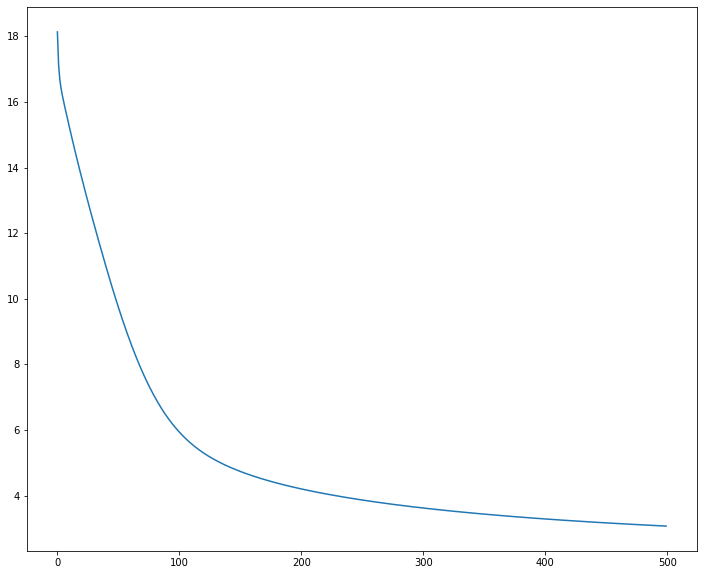

In [56]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses2)), losses2)
plt.show()

* Works pretty well, but not perfect

In [57]:
model3 = Net(D_in, H1, H2, H3, D_out)
optimizer = torch.optim.SGD(model3.parameters(), lr=1e-4 * 2)

In [58]:
losses3 = []

for t in range(500):
    y_pred = model3(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    print(t, loss.item())
    losses3.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 27.233259201049805
1 18.319625854492188
2 17.72681999206543
3 17.270479202270508
4 16.839101791381836
5 16.42673110961914
6 16.030080795288086
7 15.64758014678955
8 15.278050422668457
9 14.919309616088867
10 14.570631980895996
11 14.2310209274292
12 13.900172233581543
13 13.57675552368164
14 13.259988784790039
15 12.949234008789062
16 12.645102500915527
17 12.348613739013672
18 12.05955982208252
19 11.776917457580566
20 11.501346588134766
21 11.232918739318848
22 10.971720695495605
23 10.717578887939453
24 10.470720291137695
25 10.23132610321045
26 9.998743057250977
27 9.772228240966797
28 9.55251407623291
29 9.33989143371582
30 9.134127616882324
31 8.934980392456055
32 8.742541313171387
33 8.55674934387207
34 8.377432823181152
35 8.204628944396973
36 8.03838062286377
37 7.8786773681640625
38 7.725416660308838
39 7.578391075134277
40 7.437542915344238
41 7.3027777671813965
42 7.174105167388916
43 7.0511155128479
44 6.933670520782471
45 6.821593761444092
46 6.714656829833984
47 6.6125

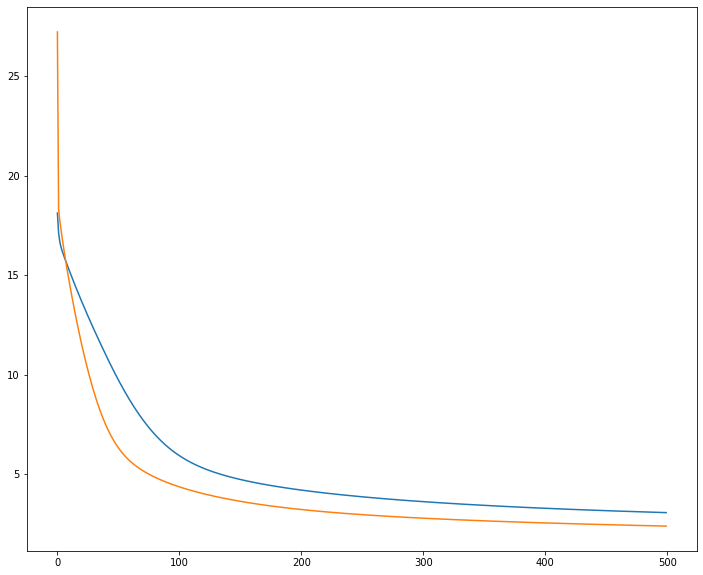

In [59]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses2)), losses2)
plt.plot(range(len(losses3)), losses3)
plt.show()

* Works Better, but not enough

In [60]:
model4 = Net(D_in, H1, H2, H3, D_out)
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-4 * 2)

In [61]:
losses4 = []

for t in range(500):
    y_pred = model4(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    print(t, loss.item())
    losses4.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 17.605117797851562
1 14.408681869506836
2 11.979934692382812
3 9.814600944519043
4 7.963066577911377
5 6.562305450439453
6 5.656070709228516
7 5.195053577423096
8 5.101422309875488
9 5.10614013671875
10 4.982861042022705
11 4.697407245635986
12 4.284317493438721
13 3.8460607528686523
14 3.499333620071411
15 3.291123390197754
16 3.210991621017456
17 3.211540937423706
18 3.209237813949585
19 3.1486732959747314
20 3.0281660556793213
21 2.865940809249878
22 2.7083778381347656
23 2.5973377227783203
24 2.535719156265259
25 2.5099196434020996
26 2.4804086685180664
27 2.4209859371185303
28 2.3423728942871094
29 2.2616682052612305
30 2.203705072402954
31 2.1720783710479736
32 2.150001049041748
33 2.1211044788360596
34 2.071934223175049
35 2.0117971897125244
36 1.9539670944213867
37 1.9109807014465332
38 1.8817095756530762
39 1.8531006574630737
40 1.8147456645965576
41 1.765209674835205
42 1.716792345046997
43 1.6753507852554321
44 1.6424895524978638
45 1.6104674339294434
46 1.5743576288223267

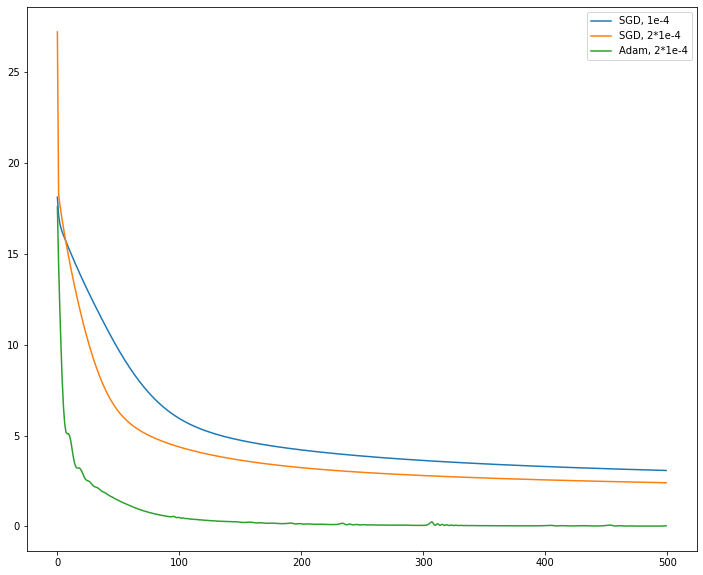

In [62]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses2)), losses2, label='SGD, 1e-4')
plt.plot(range(len(losses3)), losses3, label='SGD, 2*1e-4')
plt.plot(range(len(losses4)), losses4, label = 'Adam, 2*1e-4')

plt.legend(loc='upper right')
plt.show()

* Much Better!

# Non-Numeric Data

### Find Non-Numeric Data Columns

In [63]:
non_numeric_columns = [col for col in list(raw_data.columns) if col not in numeric_colmuns]
non_numeric_columns.remove('Id')

non_numeric_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Explore Non-Numeric Data

In [64]:
non_numeric_data = DataFrame(raw_data, columns=non_numeric_columns)

In [65]:
non_numeric_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [66]:
non_numeric_data.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [67]:
nan_columns = np.any(pd.isna(non_numeric_data), axis=0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [68]:
nan_columns

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

#### Assume NAN Values as 'N/A'

In [69]:
for col in nan_columns:
    non_numeric_data[col] = non_numeric_data[col].fillna('N/A')

#### Check NAN Data

In [70]:
nan_columns = np.any(pd.isna(non_numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [71]:
nan_columns

[]

## Convert String to int using mapping table

In [72]:
mapping_table = dict()

for col in non_numeric_columns:
    curr_mapping_table = dict()
    
    unique_values = pd.unique(non_numeric_data[col])
    for inx, v in enumerate(unique_values):
        curr_mapping_table[v] = inx + 1
        non_numeric_data[col] = non_numeric_data[col].replace(v, inx + 1)
    
    mapping_table[col] = curr_mapping_table


In [73]:
non_numeric_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,2,1,2,1,1,2,2,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1
2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,2,1,1,3,1,3,1,1,1,1,1,1,3,3,2,2,1,3,2,2,1,2,1,1,2,1,1,1,1,3,2,2,1,1,1,1,1,1,1,2
4,1,1,1,2,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1


## Normalize

#### Saving Mean, Max, Min for each Columns

In [74]:
for col in non_numeric_data:
    means[col] = non_numeric_data[col].mean()
    maxs[col] = non_numeric_data[col].max()
    mins[col] = non_numeric_data[col].min()

In [75]:
non_numeric_data = (non_numeric_data - non_numeric_data.mean()) / (non_numeric_data.max() - non_numeric_data.min())

In [76]:
non_numeric_x_df = DataFrame(non_numeric_data, columns=non_numeric_columns)
non_numeric_y_df = DataFrame(numeric_y_df)

In [77]:
non_numeric_x = torch.tensor(non_numeric_x_df.values, dtype=torch.float)
non_numeric_y = torch.tensor(non_numeric_y_df.values, dtype=torch.float)

# Linear Regression with Non-Numeric Data

In [78]:
D_in, D_out = non_numeric_x.shape[1], non_numeric_y.shape[1]

In [79]:
model5 = Net(D_in, H1, H2, H3, D_out)
optimizer = torch.optim.Adam(model5.parameters(), lr=1e-4 * 2)

In [80]:
losses5 = []

for t in range(500):
    y_pred = model5(non_numeric_x)
    
    loss = criterion(y_pred, non_numeric_y)
    print(t, loss.item())
    losses5.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 19.866493225097656
1 17.20243263244629
2 16.41498565673828
3 15.736995697021484
4 14.676652908325195
5 13.470843315124512
6 12.45115852355957
7 11.726737022399902
8 11.13717269897461
9 10.486760139465332
10 9.814217567443848
11 9.35888957977295
12 9.187396049499512
13 9.010117530822754
14 8.725364685058594
15 8.541047096252441
16 8.447308540344238
17 8.231651306152344
18 7.96147346496582
19 7.793933868408203
20 7.650570392608643
21 7.439879417419434
22 7.247565746307373
23 7.122187614440918
24 6.9823832511901855
25 6.800697326660156
26 6.641742706298828
27 6.517253398895264
28 6.3757781982421875
29 6.221981048583984
30 6.098622798919678
31 5.979581832885742
32 5.830916881561279
33 5.686000347137451
34 5.555690288543701
35 5.409247398376465
36 5.265531539916992
37 5.14827823638916
38 5.029648303985596
39 4.911580562591553
40 4.809324264526367
41 4.694687366485596
42 4.572021961212158
43 4.4581804275512695
44 4.338918685913086
45 4.231068134307861
46 4.135875225067139
47 4.035817623138

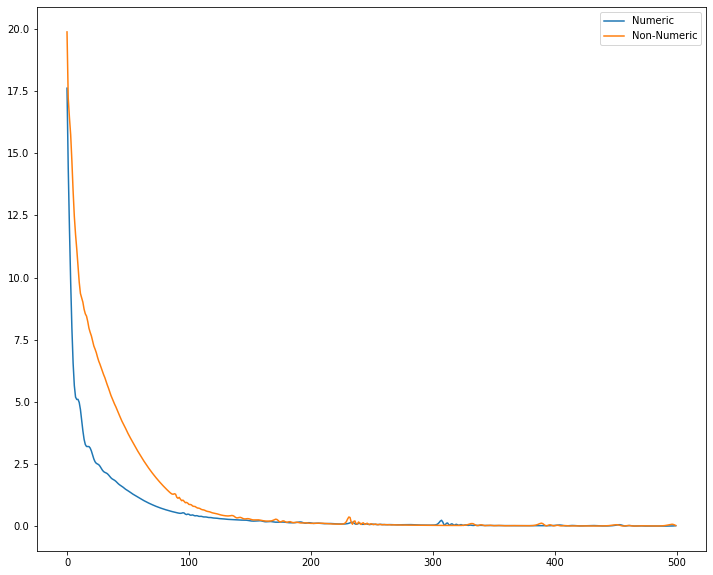

In [81]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses4)), losses4, label = 'Numeric')
plt.plot(range(len(losses5)), losses5, label = 'Non-Numeric')

plt.legend(loc='upper right')
plt.show()

* Looks like similar, so we need closer look

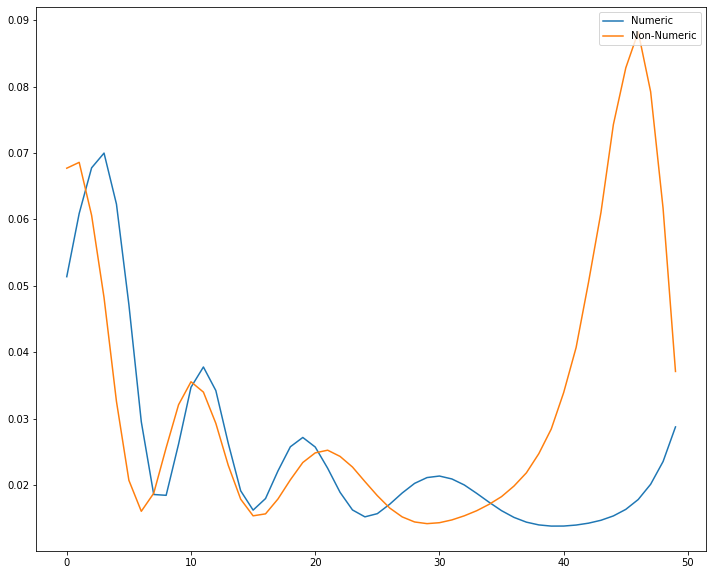

In [82]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses4[-50:])), losses4[-50:], label = 'Numeric')
plt.plot(range(len(losses5[-50:])), losses5[-50:], label = 'Non-Numeric')

plt.legend(loc='upper right')
plt.show()

# Entire Data

In [83]:
x_df = DataFrame(numeric_x_df, columns=numeric_x_columns)
y_df = DataFrame(numeric_y_df)

In [84]:
for col in non_numeric_columns:
    x_df[col] = non_numeric_x_df[col]

In [85]:
x_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.018251,-0.009661,0.100076,-0.071918,0.229943,0.302237,0.046485,-0.03158,-0.178613,-0.032967,-0.070360,0.245524,-0.010218,0.036650,0.191553,-0.028767,0.144977,0.308562,0.016695,-0.015525,0.123516,-0.204338,0.058219,0.052905,-0.109970,0.026215,-0.039772,-0.006712,-0.031377,-0.003738,-0.002806,-0.392902,0.046062,0.023568,0.058052,0.066796,-0.085103,-0.00411,-0.045205,-0.136073,-0.065068,-0.000685,-0.149144,-0.031164,-0.394920,-0.047945,-0.004892,-0.11113,-0.163503,-0.053562,-0.009295,-0.157387,-0.168813,-0.204966,-0.240183,-0.037158,-0.145342,-0.195548,-0.048288,-0.201541,-0.308219,-0.079452,-0.007808,-0.213699,-0.065068,-0.031918,-0.240183,-0.028767,-0.187397,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
1,-0.217043,-0.004285,-0.011035,0.303082,0.034291,-0.147763,0.094678,-0.03158,-0.121250,0.033481,0.022802,-0.168035,-0.010218,-0.047751,-0.141781,0.471233,0.144977,-0.191438,0.016695,-0.015525,-0.043151,0.128995,0.058219,-0.009154,0.237754,-0.085302,-0.039772,-0.006712,-0.031377,-0.003738,-0.002806,-0.120174,-0.203938,0.071491,-0.064448,0.053363,-0.085103,-0.00411,-0.045205,-0.136073,-0.065068,-0.000685,0.100856,-0.031164,-0.353253,0.077055,-0.004892,-0.11113,-0.020646,-0.053562,-0.009295,-0.085959,-0.102146,0.045034,0.093151,-0.037158,0.054658,-0.195548,-0.048288,0.048459,-0.141553,-0.079452,-0.007808,-0.213699,-0.065068,-0.031918,0.093151,-0.028767,0.012603,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
2,0.018251,0.003427,0.100076,-0.071918,0.215451,0.285571,0.007505,-0.03158,-0.057038,-0.022493,-0.055674,0.251335,-0.010218,0.050968,0.191553,-0.028767,0.144977,0.308562,0.016695,-0.015525,-0.043151,0.128995,0.058219,0.095219,-0.109970,-0.008520,-0.039772,-0.006712,-0.031377,-0.003738,-0.002806,0.243462,0.046062,0.033152,0.036802,0.065801,-0.085103,-0.00411,-0.045205,0.197260,-0.065068,-0.000685,-0.149144,-0.031164,-0.394920,-0.047945,-0.004892,-0.11113,-0.163503,-0.053562,-0.009295,-0.157387,-0.168813,-0.204966,-0.240183,-0.037158,-0.145342,-0.195548,-0.048288,0.298459,-0.308219,-0.079452,-0.007808,-0.213699,-0.065068,-0.031918,-0.240183,-0.028767,0.012603,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
3,0.077075,-0.004519,0.100076,-0.071918,-0.407738,-0.247763,-0.040333,-0.03158,-0.011661,-0.049334,-0.046266,0.198067,-0.010218,0.037968,0.191553,-0.028767,-0.188356,-0.191438,0.016695,-0.015525,0.040183,0.128995,0.308219,0.119196,-0.109970,-0.021317,0.452982,-0.006712,-0.031377,-0.003738,-0.002806,-0.392902,-0.453938,0.007593,-0.064448,0.064309,-0.085103,-0.00411,-0.045205,0.197260,-0.065068,-0.000685,0.350856,-0.031164,-0.311587,-0.047945,-0.004892,-0.11113,-0.163503,-0.053562,-0.009295,-0.014530,-0.035479,0.045034,0.093151,-0.037158,0.254658,0.054452,0.201712,-0.201541,-0.141553,-0.079452,-0.007808,0.036301,-0.065068,-0.031918,-0.240183,-0.028767,0.212603,0.047374,-0.021005,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,0.13
4,0.018251,0.017496,0.211187,-0.071918,0.208204,0.252237,0.037449,-0.03158,-0.033065,0.014332,-0.004045,0.341892

# Linear Regression with Entire Data

In [86]:
x = torch.tensor(x_df.values, dtype=torch.float)
y = torch.tensor(y_df.values, dtype=torch.float)

In [87]:
D_in, D_out = x.shape[1], y.shape[1]

In [88]:
model6 = Net(D_in, H1, H2, H3, D_out)
optimizer = torch.optim.Adam(model6.parameters(), lr=1e-4 * 2)

In [89]:
losses6 = []

for t in range(500):
    y_pred = model6(x)
    
    loss = criterion(y_pred, y)
    print(t, loss.item())
    losses6.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 19.703815460205078
1 16.8784236907959
2 14.775527000427246
3 12.926828384399414
4 11.168745040893555
5 9.527641296386719
6 8.115433692932129
7 7.004207134246826
8 6.180431365966797
9 5.592395305633545
10 5.237369537353516
11 5.059292316436768
12 4.861147403717041
13 4.555168151855469
14 4.211687088012695
15 3.875614881515503
16 3.5583126544952393
17 3.3251941204071045
18 3.219975709915161
19 3.18457293510437
20 3.162092924118042
21 3.1422812938690186
22 3.0917530059814453
23 2.986048698425293
24 2.8514697551727295
25 2.715035915374756
26 2.5795669555664062
27 2.460970878601074
28 2.379488945007324
29 2.323972225189209
30 2.276643991470337
31 2.235267162322998
32 2.189453363418579
33 2.1287169456481934
34 2.063397169113159
35 2.0016727447509766
36 1.9420170783996582
37 1.8884862661361694
38 1.841464638710022
39 1.7921518087387085
40 1.739600419998169
41 1.6870208978652954
42 1.6332751512527466
43 1.5828949213027954
44 1.5400205850601196
45 1.4999237060546875
46 1.4600201845169067
47 1

In [ ]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses4)), losses4, label = 'Numeric Only')
plt.plot(range(len(losses5)), losses5, label = 'Non-Numeric Only')
plt.plot(range(len(losses6)), losses6, label = 'Entire Data')

plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses4[-50:])), losses4[-50:], label = 'Numeric Only')
plt.plot(range(len(losses5[-50:])), losses5[-50:], label = 'Non-Numeric Only')
plt.plot(range(len(losses6[-50:])), losses6[-50:], label = 'Entire')

plt.legend(loc='upper right')
plt.show()

# Model Found!!

# Test Data

In [ ]:
raw_test_data = pd.read_csv('../input/test.csv')

In [ ]:
raw_test_data.describe()

In [ ]:
raw_test_data.head(10)

# NAN Data

In [ ]:
test_x = DataFrame(raw_test_data)
test_x = test_x.drop(columns=['Id'])

In [ ]:
for col in numeric_x_columns:
    test_x[col].fillna(0)

In [ ]:
for col in non_numeric_columns:
    test_x[col] = test_x[col].fillna('N/A')

In [ ]:
test_x.head()

## Replace String to Int

In [ ]:
for col in mapping_table.keys():
    curr_mapping_table = mapping_table[col]
    for k, v in curr_mapping_table.items():
        test_x[col] = test_x[col].replace(k, v)

In [100]:
test_x.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,5,80.0,11622,1,1,1,1,1,1,1,12,2,1,1,2,5,6,1961,1961,1,1,1,1,2,0.0,2,1,2,2,1,1,4,468.0,6,144.0,270.0,882.0,1,3,1,1,896,0,0,896,0.0,0.0,1,0,2,1,2,5,1,0,1,1,1961.0,2,1.0,730.0,1,1,1,140,0,0,0,120,0,1,2,1,0,6,2010,1,1
1,20,1,81.0,14267,1,1,2,1,1,3,1,12,1,1,1,2,6,6,1958,1958,2,1,3,6,1,108.0,2,1,2,2,1,1,2,923.0,1,0.0,406.0,1329.0,1,3,1,1,1329,0,0,1329,0.0,0.0,1,1,3,1,1,6,1,0,1,1,1958.0,2,1.0,312.0,1,1,1,393,36,0,0,0,0,1,1,3,12500,6,2010,1,1
2,60,1,74.0,13830,1,1,2,1,1,1,1,18,1,1,1,1,5,5,1997,1998,1,1,1,1,2,0.0,2,1,1,1,1,1,1,791.0,1,0.0,137.0,928.0,1,2,1,1,928,701,0,1629,0.0,0.0,2,1,3,1,2,6,1,1,2,1,1997.0,3,2.0,482.0,1,1,1,212,34,0,0,0,0,1,2,1,0,3,2010,1,1
3,60,1,78.0,9978,1,1,2,1,1,1,1,18,1,1,1,1,6,6,1998,1998,1,1,1,1,1,20.0,2,1,1,2,1,1,1,602.0,1,0.0,324.0,926.0,1,1,1,1,926,678,0,1604,0.0,0.0,2,1,3,1,1,7,1,1,3,1,1998.0,3,2.0,470.0,1,1,1,360,36,0,0,0,0,1,1,1,0,6,2010,1,1
4,120,1,43.0,5005,1,1,2,4,1,1,1,19,1,1,4,2,8,5,1992,1992,1,1,4,4,2,0.0,1,1,1,1,1,1,2,263.0,1,0.0,1017.0,1280.0,1,1,1,1,1280,0,0,1280,0.0,0.0,2,0,2,1,1,5,1,0,1,1,1992.0,1,2.0,506.0,1,1,1,0,82,0,0,144,0,1,1,1,0,1,2010,1,1
5,60,1,75.0,10000,1,1,2,1,1,3,1,18,1,1,1,1,6,5,1993,1994,1,1,4,4,2,0.0,2,1,1,1,1,1,3,0.0,1,0.0,763.0,763.0,1,2,1,1,763,892,0,1655,0.0,0.0,2,1,3,1,2,7,1,1,2,1,1993.0,3,2.0,440.0,1,1,1,157,84,0,0,0,0,1,1,1,0,4,2010,1,1
6,20,1,NaN,7980,1,1,2,1,1,1,1,18,1,1,1,2,6,7,1992,2007,1,1,4,4,2,0.0,2,2,1,1,1,1,2,935.0,1,0.0,233.0,1168.0,1,1,1,1,1187,0,0,1187,1.0,0.0,2,0,3,1,2,6,1,0,1,1,1992.0,3,2.0,420.0,1,1,1,483,21,0,0,0,0,1,4,2,500,3,2010,1,1
7,60,1,63.0,8402,1,1,2,1,1,1,1,18,1,1,1,1,6,5,1998,1998,1,1,1,1,2,0.0,2,1,1,1,1,1,3,0.0,1,0.0,789.0,789.0,1,2,1,1,789,676,0,1465,0.0,0.0,2,1,3,1,2,7,1,1,3,1,1998.0,3,2.0,393.0,1,1,1,0,75,0,0,0,0,1,1,1,0,5,2010,1,1
8,20,1,85.0,10176,1,1,1,1,1,1,1,18,1,1,1,2,7,5,1990,1990,1,1,4,4,2,0.0,2,1,1,1,1,2,1,637.0,1,0.0,663.0,1300.0,1,2,1,1,1341,0,0,1341,1.0,0.0,1,1,2,1,1,5,1,1,6,1,1990.0,2,2.0,506.0,1,1,1,192,0,0,0,0,0,1,1,1,0,2,2010,1,1
9,20,1,70.0,8400,1,1,1,1,1,3,1,12,1,1,1,2,4,5,1970,1970,1,1,8,5,2,0.0,2,1,2,2,1,1,2,804.0,5,78.0,0.0,882.0,1,3,1,1,882,0,0,882,1.0,0.0,1,0,2,1,2,4,1,0,1,1,1970.0,3,2.0,525.0,1,1,1,240,0,0,0,0,0,1,2,1,0,4,2010,1,1


## Dtype Check

In [101]:
unreplaced_columns = []

for col in test_x.columns:
    if 'N/A' in pd.unique(test_x[col]):
        unreplaced_columns.append(col)
        
print(unreplaced_columns)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [102]:
for col in unreplaced_columns:
    test_x[col] = test_x[col].replace('N/A', 0)

# Normalize

__NOTE: Normalizing should be based on train data's mean, max, min__

In [103]:
for col in test_x.columns:
    test_x[col] = (test_x[col] - means[col]) / (maxs[col] - mins[col])

# Make a Prediction

In [104]:
test_y = model6(torch.tensor(test_x.values, dtype=torch.float))

In [105]:
result = DataFrame(test_y.data.numpy(), columns=['SalePrice'])

In [106]:
result['SalePrice'] = result['SalePrice'].fillna(0)

In [107]:
result['SalePrice'] = result['SalePrice'] * (maxs['SalePrice'] - mins['SalePrice']) + means['SalePrice']

In [108]:
result['Id'] = np.array(result.index)

In [109]:
result['Id'] = result['Id'] + 1461

In [110]:
result = DataFrame(result, columns=['Id', 'SalePrice'])

In [111]:
result

,Id,SalePrice
0,1461,207612.946634
1,1462,201519.854314
2,1463,156399.779697
3,1464,150409.290756
4,1465,169466.568674
...,...,...
1454,2915,180921.195890
1455,2916,201342.401545
1456,2917,153731.788714
1457,2918,180921.195890


In [112]:
result.to_csv('./submission.csv', columns=['Id', 'SalePrice'], index=False)